In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from time import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Preprocessing

In [540]:
data = pd.read_excel("Date_Fruit_Datasets.xlsx")

In [541]:
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [542]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [543]:
# let's look for unique classes and their counts
class_counts = data.Class.value_counts()  # pandas series of classes and their counts
classes = list(class_counts.index)   # list of classes
n_classes = len(classes)   # number of classes
print(f"We've got {n_classes} classes\n")
display(class_counts)

We've got 7 classes



DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [544]:
classes

['DOKOL', 'SAFAVI', 'ROTANA', 'DEGLET', 'SOGAY', 'IRAQI', 'BERHI']

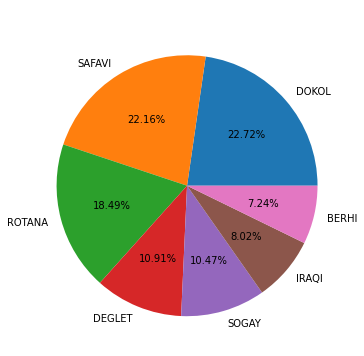

In [545]:
# lets see the class imbalance
class_dict = class_counts.to_dict()

fig = plt.figure(figsize=(6,6))
plt.pie(x=class_dict.values(), labels=class_dict.keys(), autopct='%.2f%%')
plt.title('Classes proportions', color="White")
plt.show()

View all the extreme outliers to remove them

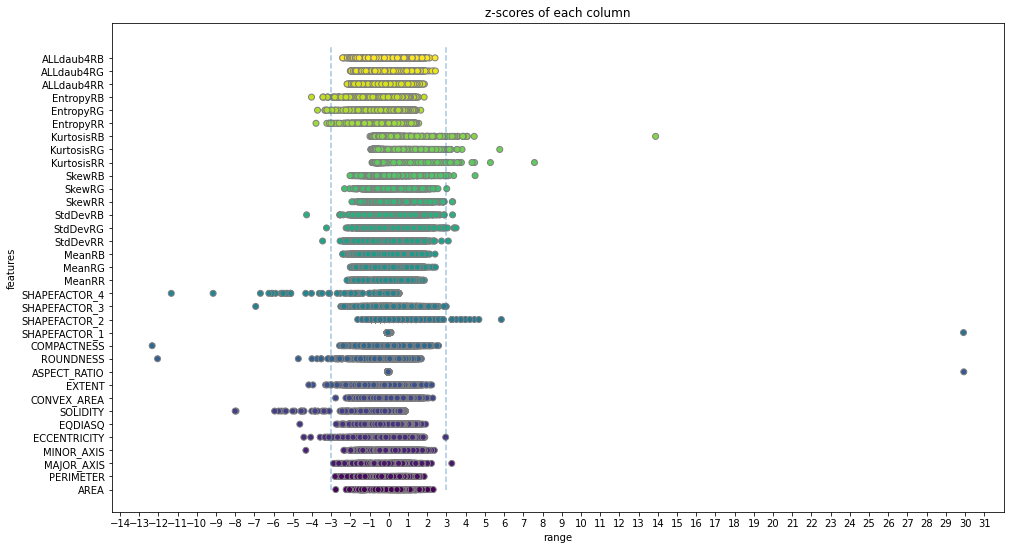

In [546]:
def scale_data(data):    # scale the data first before making any vizualisation or transformation
  if 'Class' in list(data):           # drop the Class column if any
    data_scaled = StandardScaler().fit_transform(data.drop(columns='Class'))# Standard Normalization, subtract the mean, and divide by the standard deviation
  else:
    data_scaled = StandardScaler().fit_transform(data)
  return data_scaled

def scale_data_df(data):    # scale the data first before making any vizualisation or transformation
  if 'Class' in list(data):           # drop the Class column if any
    data_scaled = data.drop(columns='Class').apply(
      lambda x: x.sub(x.mean()).div(x.std())   # Standard Normalization, subtract the mean, 
    )                                          # and divide by the standard deviation
  else:
    data_scaled = data.apply(
        lambda x: x.sub(x.mean()).div(x.std())
    )
  return data_scaled

def visualize_outliers(data):      
  data_scaled = scale_data_df(data)   # scale first, after scaling, the measurments are called z-scores
  shape_scaled = data_scaled.shape 
  y = np.arange(shape_scaled[1])[np.newaxis, ...]
  y = np.repeat(y, shape_scaled[0], axis=0)  # each column of y consists solely of one number,
                                             # and it corresponds to a feature
  plt.figure(figsize=(16,9))
  plt.scatter(x=data_scaled, y=y, c=y, edgecolor='grey')  # plot each column in a separate line
  plt.vlines(-3, 0, shape_scaled[1], linestyles='dashed', alpha=0.4)
  plt.vlines(3, 0, shape_scaled[1], linestyles='dashed', alpha=0.4)
  plt.yticks(y[0], list(data_scaled.columns))
  x_lim = plt.gca().get_xlim()
  xticks = np.arange(int(x_lim[0]), int(x_lim[1]))
  plt.xticks(xticks)
  plt.xlabel('range')
  plt.ylabel('features')
  plt.title('z-scores of each column')
  plt.show()

visualize_outliers(data)

In [547]:
tmp = scale_data_df(data[['ASPECT_RATIO', 'SHAPEFACTOR_1']]).abs()
obvious_abnormalies = pd.concat([tmp.query('ASPECT_RATIO > 3'),
                                tmp.query('SHAPEFACTOR_1 > 3')])
display(obvious_abnormalies)

,ASPECT_RATIO,SHAPEFACTOR_1
615,29.93105,29.916473
615,29.93105,29.916473


Same point! Time to remove the point.

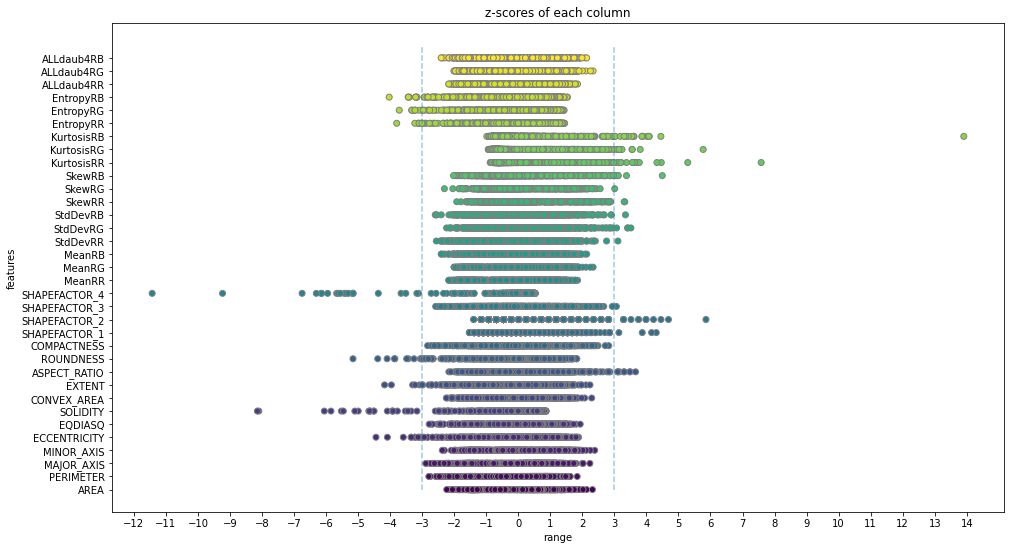

In [548]:
data.drop(obvious_abnormalies.index[0], axis=0, inplace=True)
data = data.reset_index(drop=True)
visualize_outliers(data)

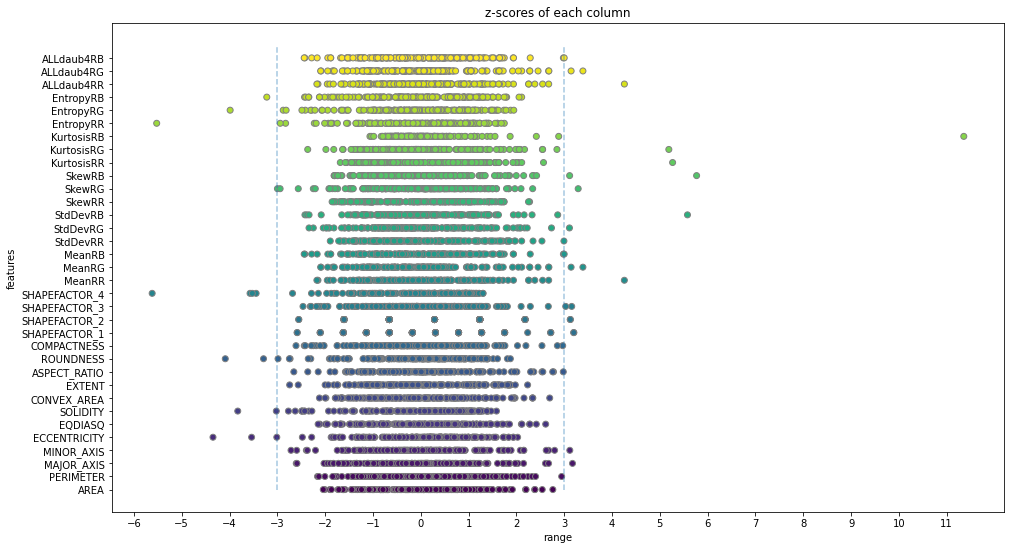

In [549]:
visualize_outliers(data.query('Class == "SAFAVI"'))

In [550]:
def apply_z_score_rule(data, range):
  a, b = range
  outliers_per_column = data.groupby('Class').apply(lambda x: scale_data_df(x)) \
                                  .apply(lambda x: ~x.between(a,b))      

  # aggregate by class then,
  # check and mark the points that are outside the [a, b] range given every column

  for i, col in enumerate(outliers_per_column.columns):
    true_false = outliers_per_column[col].value_counts() # how many True, how many anomaly
    print(col, true_false.get(True, 0), end=' '*(20 - len(col)))
    if (i+1) % 5 == 0:
      print()

  # now let's see how many points that have any of their features goes outside the [a, b] range 
  is_outlier = pd.Series(False, index = data.index, dtype=bool)  # initiating, all False
  for col in outliers_per_column.columns:
    is_outlier = is_outlier | outliers_per_column[col]  # if any of the its columns is True than the point is an outlier
  print(f"\n\nNumber of outliers in {is_outlier.shape[0]} data points is: ", is_outlier.value_counts().get(True, 0))

  return is_outlier

is_outlier = apply_z_score_rule(data, [-3,3])

AREA 1                PERIMETER 4           MAJOR_AXIS 1          MINOR_AXIS 4          ECCENTRICITY 10        
EQDIASQ 3             SOLIDITY 17            CONVEX_AREA 1         EXTENT 4              ASPECT_RATIO 1        
ROUNDNESS 9           COMPACTNESS 2         SHAPEFACTOR_1 9       SHAPEFACTOR_2 10       SHAPEFACTOR_3 5       
SHAPEFACTOR_4 19       MeanRR 2              MeanRG 2              MeanRB 2              StdDevRR 2            
StdDevRG 1            StdDevRB 4            SkewRR 3              SkewRG 3              SkewRB 4              
KurtosisRR 10          KurtosisRG 10          KurtosisRB 7          EntropyRR 6           EntropyRG 5           
EntropyRB 5           ALLdaub4RR 2          ALLdaub4RG 2          ALLdaub4RB 2          

Number of outliers in 897 data points is:  86


In [551]:
_ = apply_z_score_rule(data, [-4,4])

AREA 0                PERIMETER 0           MAJOR_AXIS 0          MINOR_AXIS 0          ECCENTRICITY 1        
EQDIASQ 0             SOLIDITY 7            CONVEX_AREA 0         EXTENT 0              ASPECT_RATIO 0        
ROUNDNESS 3           COMPACTNESS 0         SHAPEFACTOR_1 4       SHAPEFACTOR_2 1       SHAPEFACTOR_3 0       
SHAPEFACTOR_4 9       MeanRR 1              MeanRG 0              MeanRB 0              StdDevRR 0            
StdDevRG 0            StdDevRB 1            SkewRR 0              SkewRG 0              SkewRB 1              
KurtosisRR 3          KurtosisRG 5          KurtosisRB 5          EntropyRR 1           EntropyRG 1           
EntropyRB 1           ALLdaub4RR 1          ALLdaub4RG 0          ALLdaub4RB 0          

Number of outliers in 897 data points is:  29


In [552]:
is_outlier

0      False
1      False
2       True
3      False
4      False
       ...  
892    False
893     True
894    False
895    False
896    False
Length: 897, dtype: bool

In [553]:
data[is_outlier].Class.value_counts()

DOKOL     19
SAFAVI    18
ROTANA    17
SOGAY      9
BERHI      8
IRAQI      8
DEGLET     7
Name: Class, dtype: int64

In [554]:
def plot_histogram_by_class(column, ax, bins=20, legend=False):  # take a column, an ax
  col = data[column]                                        # and plot a histogram
  _, bins = np.histogram(col, bins=bins)
  colors = ['#008000', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']
  for i, Class in enumerate(classes):   # each class' distribution
    ax.hist(col[data['Class'] == Class], bins=bins, 
            color=colors[i], alpha=.5, label=Class,
            edgecolor='black')
  ax.set_yticks(())
  ax.set_title(column)
  ax.set_xlabel('Column Magnitude')
  ax.set_ylabel('Frequency')
  if legend:
    ax.legend(loc='best')

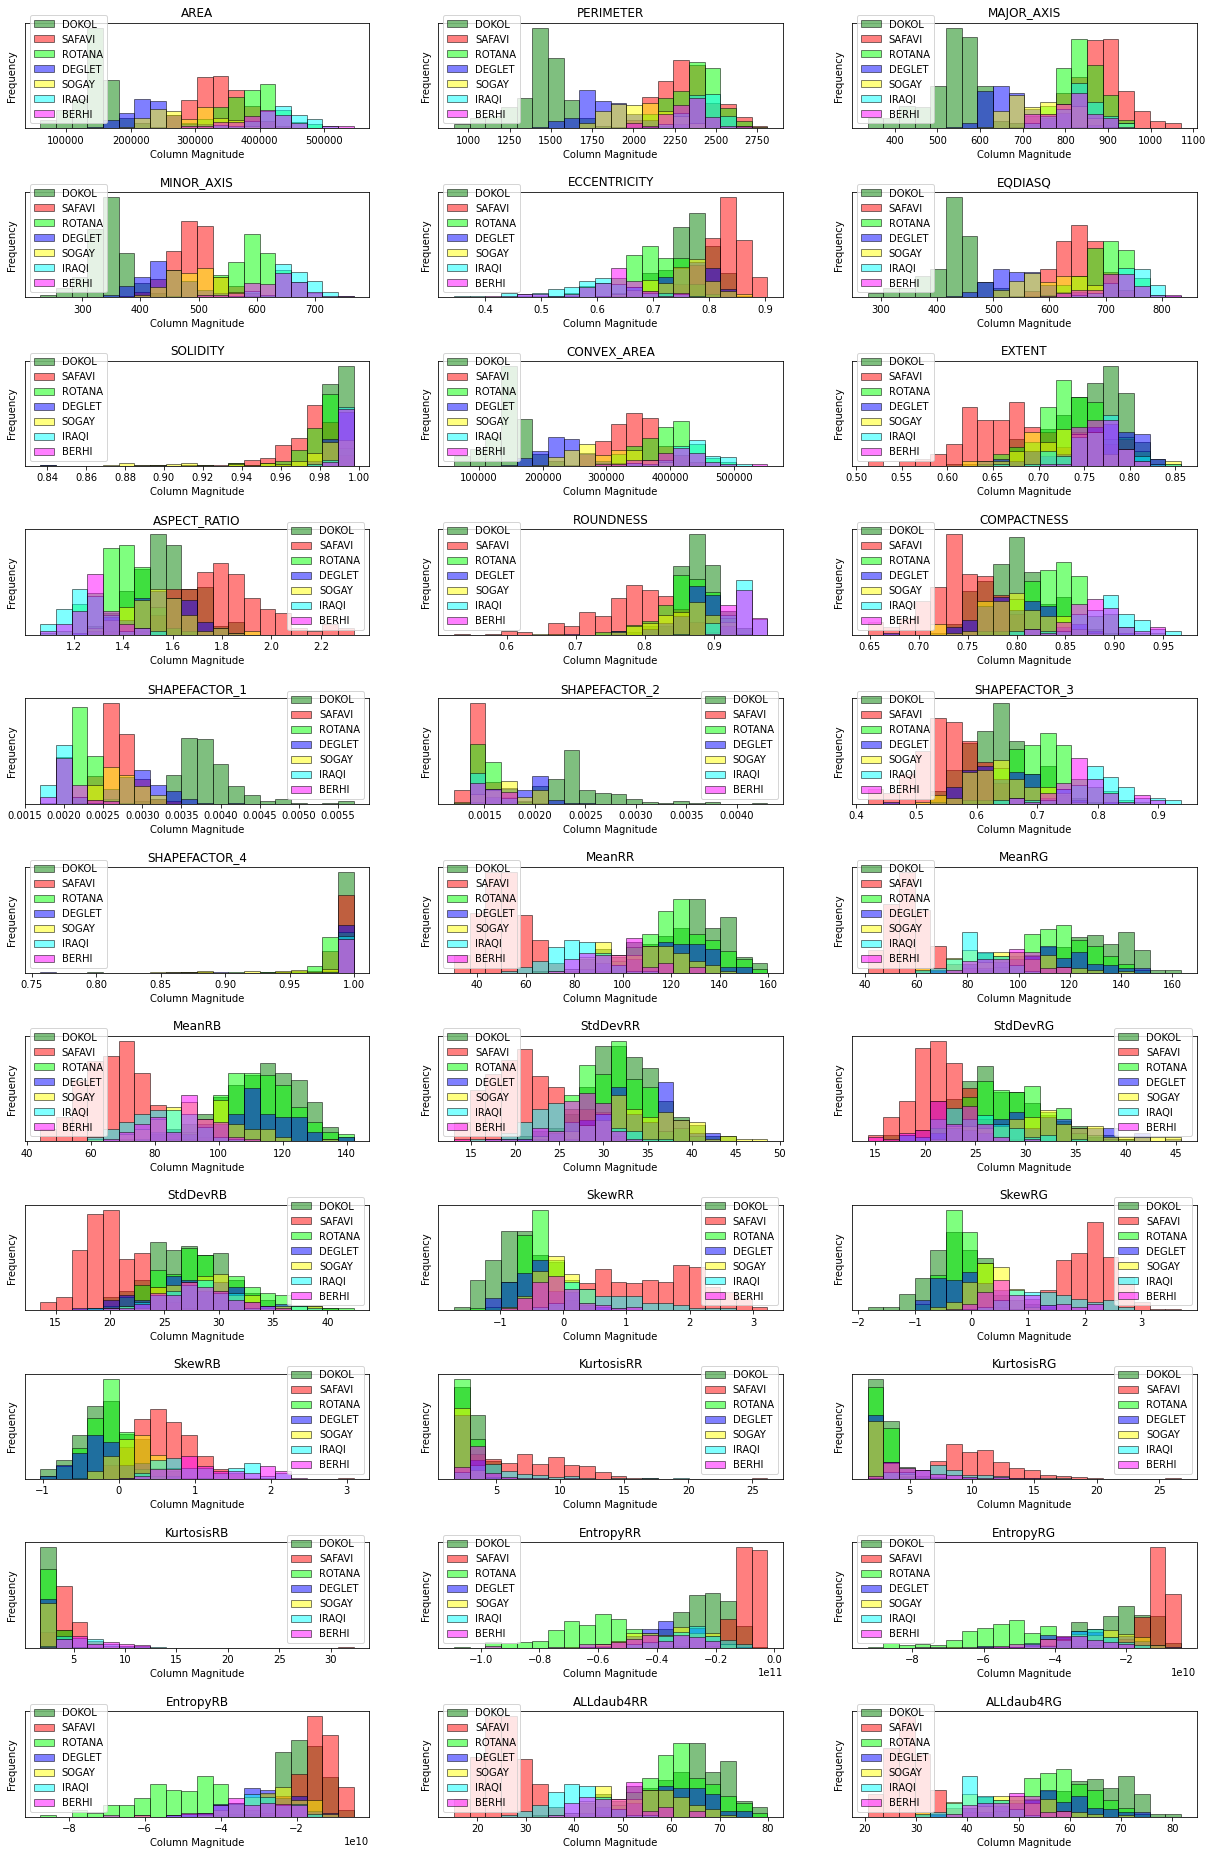

In [555]:
nrows, ncols = 11, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(7 * ncols, 3 * nrows))
plt.subplots_adjust(hspace=0.6)
for i in range(nrows * ncols):
  plot_histogram_by_class(data.columns[i], axes.ravel()[i],
                          legend=True)

It seems like 'SAFAVI' has a very distinctive distribution in the most of the features, as well as 'DOKOL' in a lesser extent, 'DOKOL' is determined by most of the first 12 features, while 'SAFAVI' is determined by most of other features, we can see it evidently from the distributions where a class disentangle itself clearly from others, we suspect that 'DOKOL' and 'SAFAVI' will get easily classified by models, however for other classes, it's not clear at all.

on the other hand, it looks like SOLIDITY and SHAPEFACTOR_4 are uninformative since the class distributions are utterly undistinguishable.

before applying any machine learning algorithm let's first set aside a test set, we are gonna use stratified splitting to keep proportions of each class, since we have imbalenced classes and little data.

In [556]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(
    n_splits=10, test_size=0.2, random_state=42
)

for train_index, test_index in stratified_split.split(data, data.Class):
    pass

test_data = data.iloc[test_index].reset_index(drop=True)
train_data = data.iloc[train_index].reset_index(drop=True)

train_class_frequencies = data.iloc[train_index].\
    Class.value_counts().to_frame().\
    apply(lambda x: x.div(x.sum())*100).\
    rename(columns = dict(Class='train_class_frequencies'))

test_class_frequencies = data.iloc[test_index].\
    Class.value_counts().to_frame().\
    apply(lambda x: x.div(x.sum())*100).\
    rename(columns = dict(Class='test_class_frequencies'))

display(train_class_frequencies.join(test_class_frequencies))

,train_class_frequencies,test_class_frequencies
DOKOL,22.733612,22.777778
SAFAVI,22.036262,22.222222
ROTANA,18.549512,18.333333
DEGLET,10.878661,11.111111
SOGAY,10.460251,10.555556
IRAQI,8.089261,7.777778
BERHI,7.252441,7.222222


we need something to help us asses and quantify the useability of each feature, here for a first try we're going to utilize ANOVA, a univariate statistics for automatique feature selection, it looks for statistical relationships between each feature and the target, it considers each featue at a time, which neglect the correlation between features.

In [557]:
from sklearn.feature_selection import SelectPercentile

# Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores.
select = SelectPercentile(percentile=100)
select.fit(scale_data(train_data), train_data['Class'])

SelectPercentile(percentile=100)

In [558]:
def plot_heatmap(scores, col_labels=None, row_labels=None, labels=None,
                 xlabel=None, ylabel=None, cmap='viridis', cbar=False,
                 cbar_label=None, title=None, figsize=None):
  nrows, ncols = scores.shape
  if figsize is None:
    figsize=(4 * ncols, 4 * nrows)
  fig, ax = plt.subplots(figsize=figsize)
  im = ax.imshow(scores, cmap=cmap)
  ax.set_xticks(())
  ax.set_yticks(())
  if row_labels is not None:
    ax.set_xticks(np.arange(ncols))
    ax.set_xticklabels(col_labels, fontdict={'fontsize':12})
  if row_labels is not None:
    ax.set_yticks(np.arange(nrows))
    ax.set_yticklabels(row_labels, rotation=90, va='center', fontdict={'fontsize':12})
  if title is not None:
    ax.set_title(title, fontdict={'fontsize':figsize[0]})
  if xlabel is not None:
    ax.set_xlabel(xlabel)
  if ylabel is not None:
    ax.set_ylabel(ylabel)

  if cbar:        # if colorbar is requested
    cbar = ax.figure.colorbar(im, ax=ax)
  if cbar_label is not None:
    cbar.ax.set_ylabel(cbar_label, rotation=90, va='top', fontdict={'fontsize':figsize[1]})

  # scores, and annotations if any
  for i in range(nrows):
    for j in range(ncols):
      if labels is not None and len(labels) > i*ncols + j: # if annotations (labels) are given
        text = str(scores[i, j]) + '\n' + labels[i*ncols + j]
      else:
        text = scores[i, j]
      ax.text(j, i, text,
              ha='center', va='center', color='grey',
              fontdict={'fontsize':14, 'fontweight':'bold'})
  plt.show()

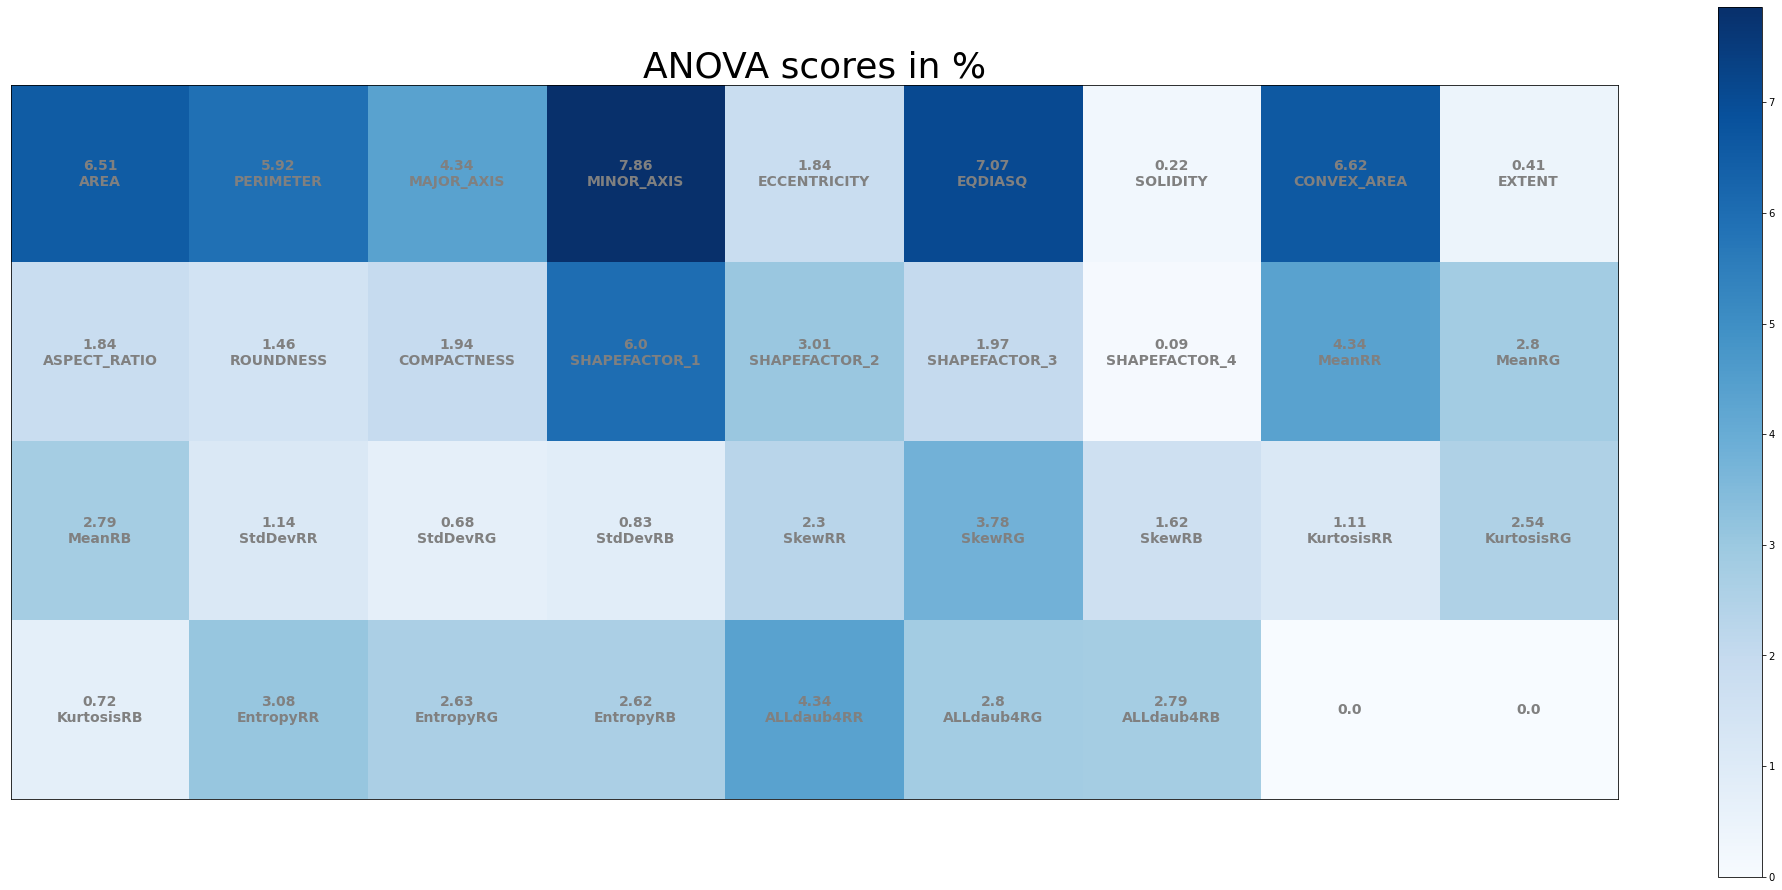

In [559]:
scores = select.scores_
scores = scores / scores.sum() * 100 
scores = np.round(scores, 2)
scores = np.append(scores, [0, 0]).reshape((4, 9))

plot_heatmap(scores, labels=list(train_data)[:-1], 
             title="ANOVA scores in %", cmap='Blues', cbar=True)

In [560]:
# from pandas dataframe to numpy array
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].replace(classes, 
                                      np.arange(len(classes))
                                      ).values

X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].replace(classes, 
                                    np.arange(len(classes))
                                    ).values

# the scaled version
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Dimensionality Reduction is a mathematical technique used to transform data from high into low dimensional-space, in a way that most of information are preserved, usually used for visualizaion, the most popular technique is Principal Component Analysis, but here we use another powerful tool, t-SNE. We will also do a PCA one for comparison purpose.

let's project our data into two dimensional space and plot the points.

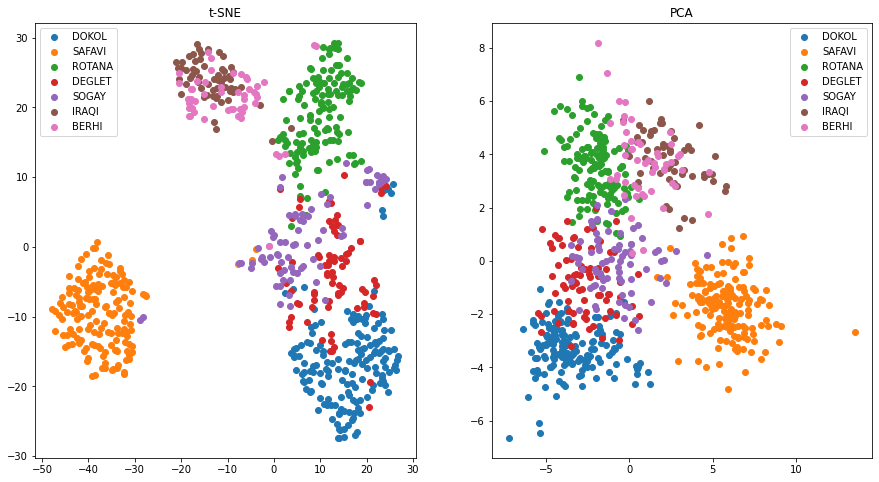

In [561]:
from random import random
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA

tsne = TSNE(random_state=42)
pca = PCA(n_components=2,random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled, y_train)
X_train_pca = pca.fit(X_train_scaled).transform(X_train_scaled)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
for label in range(len(classes)):
  mask = y_train == label
  axes[0].scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], label=classes[label])
#   ax.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=classes[label])
axes[0].title.set_text('t-SNE')
axes[0].legend()

for label in range(len(classes)):
  mask = y_train == label
  axes[1].scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=classes[label])
#   ax.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=classes[label])
axes[1].title.set_text('PCA')
axes[1].legend()

plt.show()
# plt.tight_layout()

the classes that are separable after being downtransfromed to 2D will naturally be separable in the original dimensionality, but those that are not they may and they may not be separable in the original dimensionality.

it looks like 'SAFAVI' is the most distinguished one, as well as 'ROTANA' to a lesser extent, others look kind of overlapped, but 'IRAQI' and 'BERHI' look totally jumbled, this may not be necessarily the case in original space.

# K-Means Clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

$$ \sum \limits _{i=0} ^{n} \min \limits _{\mu_{j}  \in C}(\| x_{i}-\mu_{j}\|)^{2} $$

In [562]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'x10^3', 'x10^6', 'x10^9', 'x10^12', 'x10^15', 'x10^18', 'x10^21'][magnitude])

In [563]:
date_data = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values
(n_samples, n_features), n_dates = date_data.shape, np.unique(labels).size

print(f"# classes: {n_dates}; # samples: {n_samples}; # features {n_features}")

# classes: 7; # samples: 897; # features 34


In [564]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def bench_kmeans(kmean, name, data, labels):

    # Define the metrics which require only the true labels and estimator
    # labels

    evaluation = pd.DataFrame({'Model':[],
                            'Details':[],
                            'Scaler':[],
                            'Time':[],
                            'Inertia':[],
                           'Homogeneity':[],
                           'Completeness':[],
                           'V_measure':[],
                           'Adjusted Rand Score':[],
                           'Adjusted Mutual Info Score':[],
                           "Fowlkes Mallows Score": [],
                           'Sihoulete Score':[],
                           "Calinski Harabasz Score":[],
                           "Davies Bouldin Score": []})
                           
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.fowlkes_mallows_score
    ]
    # The scores requires the full dataset
    clustering_metrics_1 = [
        metrics.silhouette_score,
        metrics.calinski_harabasz_score,
        metrics.davies_bouldin_score
    ]

    scalers = [('None',False),('MinMaxScaler',MinMaxScaler()),('Standardize',StandardScaler())]
    
    for scaler in scalers:
        if scaler[0] != 'None':
            t0 = time()
            estimator = make_pipeline(scaler[1], kmean).fit(data)
            fit_time = time() - t0
            detail = kmean.get_params(deep=True)['init']
            results = [name, f"{detail}",str(scaler[0]), fit_time, human_format(estimator[-1].inertia_)]      
            results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
            results += [m(data, estimator[-1].labels_) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True) 
        else:
            t0 = time()
            estimator = kmean.fit(data)
            fit_time = time() - t0
            detail = kmean.get_params(deep=True)['init']
            results = [name, f"{detail}", str(scaler[0]), fit_time, human_format(kmean.inertia_)]      
            results += [m(labels, kmean.labels_) for m in clustering_metrics]
            results += [m(data, kmean.labels_) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True)   

    # Show the results
    # formatter_result = (
    #     "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    # )

    return evaluation

In [565]:
kmeans = KMeans(init="k-means++", n_clusters=n_dates, n_init=10, random_state=0)
kmeans.get_params(deep=True)['init']
# kmeans1 = bench_kmeans(kmean=kmeans,name="k-means++", data=date_data, labels=labels)
# kmeans1

'k-means++'

## Mini Batch K-Means

The **MiniBatchKMeans** is a variant of the **KMeans** algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step, $b$ samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

**MiniBatchKMeans** converges faster than **KMeans**, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the example and cited reference.

In [566]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

# print(82 * "_")
# print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

# Prepare data for visualizing
date_data_1 = StandardScaler().fit_transform(date_data)
date_data_2 = MinMaxScaler().fit_transform(date_data)
pca = PCA(n_components=n_dates).fit(date_data_1)

kmeans = KMeans(init="k-means++", n_clusters=n_dates, n_init=10, random_state=0)
kmeans_1 = bench_kmeans(kmean=kmeans, name="kmeans", data=date_data, labels=labels)

mini_batch_kmeans = MiniBatchKMeans(init="k-means++", n_clusters=n_dates, n_init=10, random_state=0)
mini_kmeans = bench_kmeans(kmean=mini_batch_kmeans, name="kmeans", data=date_data, labels=labels)

kmeans1 = KMeans(init="random", n_clusters=n_dates,n_init=10, random_state=0)
kmeans_2=bench_kmeans(kmean=kmeans1, name="kmeans", data=date_data, labels=labels)

kmeans2 = KMeans(init=pca.components_, n_clusters=n_dates, n_init=10)
kmeans_pca=bench_kmeans(kmean=kmeans2, name="kmeans", data=date_data, labels=labels)

sum = [kmeans_1, mini_kmeans, kmeans_2, kmeans_pca]

evaluation = pd.concat(sum, axis=0)
# evaluation.sort_values(by = 'Adjusted Rand Score', ascending=False, inplace=True)
evaluation.reset_index(inplace=True)
evaluation=evaluation.iloc[:,1:]
for i in range(9,12):
    evaluation.at[i,'Details'] = 'PCA Based'
evaluation

# print(82 * "_")

C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)
C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


,Model,Details,Scaler,Time,Inertia,Homogeneity,Completeness,V_measure,Adjusted Rand Score,Adjusted Mutual Info Score,Fowlkes Mallows Score,Sihoulete Score,Calinski Harabasz Score,Davies Bouldin Score
0,kmeans,k-means++,None,0.148907,44x10^21,0.366048,0.378549,0.372193,0.304456,0.364954,0.425422,0.418884,2654.602689,0.741580
1,kmeans,k-means++,MinMaxScaler,0.123924,253,0.737093,0.717178,0.726999,0.701579,0.724002,0.750333,0.089959,638.265140,2.169585
2,kmeans,k-means++,Standardize,0.102937,8.72x10^3,0.710215,0.717081,0.713631,0.682319,0.710381,0.735566,0.068366,563.912458,2.882822
3,kmeans,k-means++,None,0.252844,44.5x10^21,0.363914,0.377225,0.370450,0.309703,0.363191,0.430657,0.421864,2636.622876,0.752392
4,kmeans,k-means++,MinMaxScaler,0.208519,255,0.708124,0.689667,0.698774,0.665376,0.695463,0.719930,0.100432,655.996503,2.214359
5,kmeans,k-means++,Standardize,0.203886,8.96x10^3,0.672438,0.699635,0.685767,0.681443,0.682137,0.737633,0.092742,457.452681,3.824177
6,kmeans,random,None,0.089944,44x10^21,0.366048,0.378549,0.372193,0.304456,0.364954,0.425422,0.418884,2654.602689,0.741580
7,kmeans,random,MinMaxScaler,0.086424,254,0.715052,0.693512,0.704117,0.672177,0.700875,0.725527,0.100820,672.681842,2.466217
8,kmeans,random,Standardize,0.078950,8.75x10^3,0.703431,0.708974,0.706192,0.688964,0.702863,0.741045,0.088386,594.155752,2.851556
9,kmeans,PCA Based,None,0.015991,52.3x10^21,0.352398,0.400941,0.375106,0.308886,0.368066,0.441277,0.446011,2209.048728,0.629325


In [567]:
t1 = evaluation[evaluation['Model'] == 'k-means++']['Time']
t2 = evaluation[evaluation['Model'] == 'MiniBatchKMeans']['Time']

Create reduced reduced PCA and TSNE data on 2D plane to view the difference between K-Means Clustering and MiniBatchK-Means

In [570]:
reduced_data = PCA(n_components=2).fit_transform(date_data_1)
reduced_data_tsne = TSNE(random_state=42).fit_transform(date_data_1)

kmeans_3=KMeans(init="k-means++", n_clusters=n_dates, n_init=10, random_state=0)
kmeans_3.fit(reduced_data)

kmeans_4=KMeans(init="random", n_clusters=n_dates, n_init=10, random_state=0)
kmeans_4.fit(reduced_data)

KMeans(init='random', n_clusters=7, random_state=0)

Pair cluster center to their closest one => create labels for each clustering method

In [571]:
from sklearn.metrics.pairwise import pairwise_distances_argmin, pairwise_distances

k_means_cluster_centers = kmeans_3.cluster_centers_
order = pairwise_distances(kmeans_3.cluster_centers_, Y=kmeans_4.cluster_centers_,metric="euclidean").argmin(axis=1)
mbk_means_cluster_centers = kmeans_4.cluster_centers_[order]

k_means_labels = pairwise_distances(reduced_data, Y=k_means_cluster_centers, metric="euclidean").argmin(axis=1)
mbk_means_labels = pairwise_distances(reduced_data, Y=mbk_means_cluster_centers, metric="euclidean").argmin(axis=1)

Plot the clustering method on the reduced 2D dataset with the difference between 2 added

In [572]:
from matplotlib.pyplot import cm

def plot_kmeans(kmeans1, kmeans2, data):

    t0 = time()
    kmeans1.fit(data)
    t_kmeans = time() - t0

    t0 = time()
    kmeans2.fit(data)
    t_minibatch = time() - t0

    k_means_cluster_centers = kmeans1.cluster_centers_
    order = pairwise_distances(kmeans1.cluster_centers_, Y=kmeans2.cluster_centers_,metric="euclidean").argmin(axis=1)
    mbk_means_cluster_centers = kmeans2.cluster_centers_[order]

    k_means_labels = pairwise_distances(data, Y=k_means_cluster_centers, metric="euclidean").argmin(axis=1)
    mbk_means_labels = pairwise_distances(data, Y=mbk_means_cluster_centers, metric="euclidean").argmin(axis=1)


    fig = plt.figure(figsize=(15, 8))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
    # colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d']
    colors = cm.rainbow(np.linspace(0, 1, n_dates))

    # KMeans
    ax = fig.add_subplot(1, 3, 1)
    for k, col in zip(range(n_dates), colors):
        my_members = k_means_labels == k
        cluster_center = k_means_cluster_centers[k]
        ax.plot(data[my_members, 0], data[my_members, 1], "w", markerfacecolor=col, marker="o")
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markeredgecolor="k",
            markersize=6,
        )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('KMeans1', color='white')
    plt.text(0, 0, "train time: %.2fs\ninertia: %.0f" % (t_kmeans, kmeans1.inertia_))

    # MiniBatchKMeans
    ax = fig.add_subplot(1, 3, 2)
    for k, col in zip(range(n_dates), colors):
        my_members = mbk_means_labels == k
        cluster_center = mbk_means_cluster_centers[k]
        ax.plot(data[my_members, 0], data[my_members, 1], "w", markerfacecolor=col, marker="o")
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markeredgecolor="k",
            markersize=6,
        )
    ax.set_title("KMeans2", color = "White")
    ax.set_xticks(())
    ax.set_yticks(())
    plt.text(0, 0, "train time: %.2fs\ninertia: %.0f" % (t_minibatch, kmeans2.inertia_))

    different = False
    ax = fig.add_subplot(1, 3, 3)

    for k in range(n_dates):
        different += (k_means_labels == k) != (mbk_means_labels == k)

    identic = np.logical_not(different)
    ax.plot(data[identic, 0], data[identic, 1], "w", markerfacecolor="#bbbbbb", marker="o")
    ax.plot(data[different, 0], data[different, 1], "w", markerfacecolor="m", marker="o")
    ax.set_title("Difference",color="White")
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

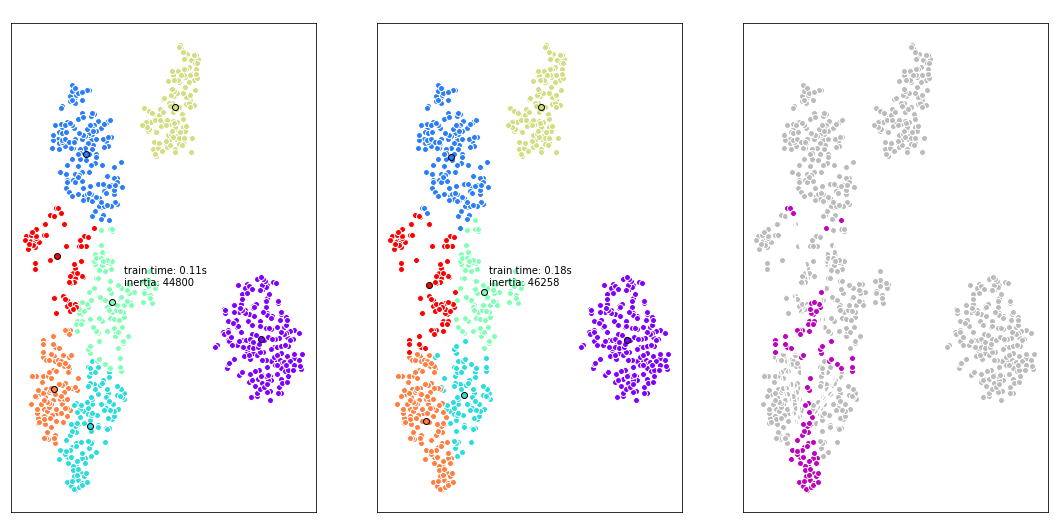

In [573]:
kmeans_3=KMeans(init="k-means++", n_clusters=n_dates, n_init=10, random_state=0)
kmeans_4 = MiniBatchKMeans(init="k-means++", n_clusters=n_dates, n_init=10, random_state=0)
plot_kmeans(kmeans_3, kmeans_4, reduced_data_tsne)

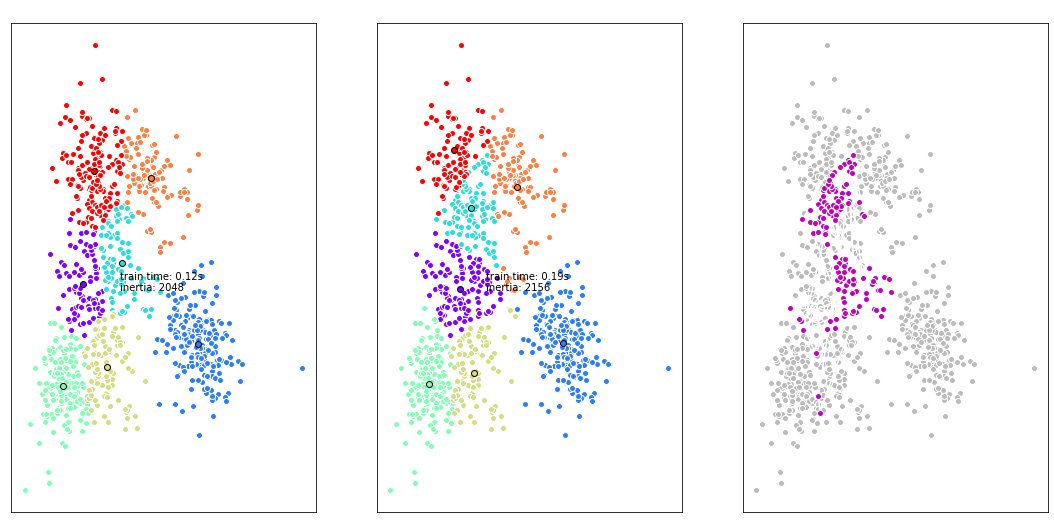

In [575]:
plot_kmeans(kmeans_3, kmeans_4, reduced_data)

# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

* The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. 
* Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. 
* The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. 
* A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and $eps$, which define formally what we mean when we say dense. 
* Higher min_samples or lower eps indicate higher density necessary to form a cluster.

In [576]:
from scipy.spatial.distance import pdist

min = pairwise_distances(date_data).argmin()
max = pairwise_distances(date_data).argmax()
print(f"Min distance pairwise is: {min}")
print(f"Max distance pairwise is: {max}")

Min distance pairwise is: 0
Max distance pairwise is: 425881


Trying to find out the optimal parameters for dbscan!

**min_samples**

There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:

* The larger the data set, the larger the value of MinPts should be
* If the data set is noisier, choose a larger value of MinPts
* Generally, MinPts should be greater than or equal to the dimensionality of the data set
* For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
* If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

**eps**

After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in this [paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf). This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).



So we choose MinPts = 7 class * 2 = 14

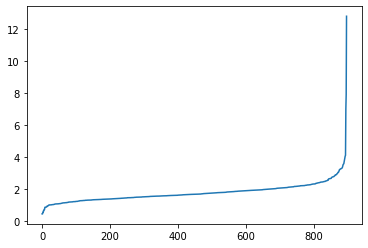

In [577]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(date_data_1)
distances, indices = neighbors_fit.kneighbors(date_data_1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

From the graph we can see $ 2 < eps < 3 $, we will test each and every one of them

In [578]:
from sklearn.cluster import DBSCAN

eps_range = np.linspace(2, 3, 20)
for eps in eps_range:                                # for every eps print the unique cluster labels
  dbscan = DBSCAN(min_samples=14, eps=eps)            # and their counts
  dbscan_labels = dbscan.fit_predict(date_data_1)   # the noisy points are assigned a label of -1
  unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
  print(f'eps={eps:.3}: \n\tunique labels:  {list(unique_labels)} \n\tcounts:\t\t{list(counts)}')

eps=2.0: 
	unique labels:  [-1, 0, 1, 2] 
	counts:		[636, 23, 157, 81]
eps=2.05: 
	unique labels:  [-1, 0, 1, 2] 
	counts:		[602, 26, 169, 100]
eps=2.11: 
	unique labels:  [-1, 0, 1, 2, 3, 4, 5] 
	counts:		[533, 41, 181, 107, 14, 12, 9]
eps=2.16: 
	unique labels:  [-1, 0, 1, 2, 3, 4] 
	counts:		[453, 59, 199, 115, 61, 10]
eps=2.21: 
	unique labels:  [-1, 0, 1, 2, 3, 4] 
	counts:		[379, 64, 221, 9, 147, 77]
eps=2.26: 
	unique labels:  [-1, 0, 1, 2] 
	counts:		[328, 71, 411, 87]
eps=2.32: 
	unique labels:  [-1, 0, 1, 2] 
	counts:		[279, 79, 434, 105]
eps=2.37: 
	unique labels:  [-1, 0, 1] 
	counts:		[237, 535, 125]
eps=2.42: 
	unique labels:  [-1, 0, 1] 
	counts:		[213, 551, 133]
eps=2.47: 
	unique labels:  [-1, 0, 1] 
	counts:		[185, 570, 142]
eps=2.53: 
	unique labels:  [-1, 0, 1] 
	counts:		[156, 589, 152]
eps=2.58: 
	unique labels:  [-1, 0, 1] 
	counts:		[135, 603, 159]
eps=2.63: 
	unique labels:  [-1, 0, 1] 
	counts:		[126, 610, 161]
eps=2.68: 
	unique labels:  [-1, 0, 1] 
	counts:	

With the objective of obtaining the most possible number of cluster, which is 6 in this case, so we will choose $eps = 2.11$ but in reality we will some statistic significant outputs to get the general view of the result.

With that in mind, we will also need to choose the result with more than 2 label for sihoulette score to be able to measure the evaluation.

In [579]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def bench_model(model, name, data, labels):

    # Define the metrics which require only the true labels and estimator
    # labels

    evaluation = pd.DataFrame({'Model':[],
                            'Details':[],
                            'Scaler':[],
                            'Time':[],
                            'Inertia':[],
                           'Homogeneity':[],
                           'Completeness':[],
                           'V_measure':[],
                           'Adjusted Rand Score':[],
                           'Adjusted Mutual Info Score':[],
                           "Fowlkes Mallows Score": [],
                           'Sihoulete Score':[],
                           "Calinski Harabasz Score":[],
                           "Davies Bouldin Score": []})
                           
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.fowlkes_mallows_score
    ]
    # The scores requires the full dataset
    clustering_metrics_1 = [
        metrics.silhouette_score,
        metrics.calinski_harabasz_score,
        metrics.davies_bouldin_score
    ]

    scalers = [('Standardize',StandardScaler())]
    
    for scaler in scalers:
        if scaler[0] != 'None':
            t0 = time()
            estimator = make_pipeline(scaler[1], model).fit(data)
            fit_time = time() - t0
            results = [name, f"n_cluster: {len(set(estimator[-1].labels_)) - (1 if -1 in estimator[-1].labels_ else 0)}, eps = {estimator[-1].get_params(deep=True)['eps']}", str(scaler[0]), fit_time, "-"]      
            results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
            results += [m(data, estimator[-1].labels_) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True) 
        else:
            t0 = time()
            estimator = model.fit(data)
            fit_time = time() - t0
            results = [name, f"n_cluster = {len(set(estimator[-1].labels_)) - (1 if -1 in estimator[-1].labels_ else 0)}, eps = {estimator[-1].get_params(deep=True)['eps']}", str(scaler[0]), fit_time, "-"]        
            results += [m(labels, model.labels_) for m in clustering_metrics]
            results += [m(data, model.labels_) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True)   

    # Show the results
    # formatter_result = (
    #     "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    # )

    return evaluation

In [580]:
# print(82 * "_")
# print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

dbscan0 = DBSCAN(eps=2.0, min_samples=14)
dbscan_0 = bench_model(model=dbscan0,name="DBSCAN", data=date_data, labels=labels)

dbscan1 = DBSCAN(eps=2.11, min_samples=14)
dbscan_1 = bench_model(model=dbscan1, name="DBSCAN", data=date_data, labels=labels)

dbscan2 = DBSCAN(eps=2.16, min_samples=14)
dbscan_2 = bench_model(model=dbscan2, name="DBSCAN", data=date_data, labels=labels)

dbscan3 = DBSCAN(eps=2.21, min_samples=14)
dbscan_3 = bench_model(model=dbscan3, name="DBSCAN", data=date_data, labels=labels)

dbscan4 = DBSCAN(eps=2.89, min_samples=14)
dbscan_4 = bench_model(model=dbscan4, name="DBSCAN", data=date_data, labels=labels)

dbscan5 = DBSCAN(eps=3, min_samples=14)
dbscan_5 = bench_model(model=dbscan5, name="DBSCAN", data=date_data, labels=labels)

total_dbscan = [dbscan_0, dbscan_1, dbscan_2, dbscan_3, dbscan_4, dbscan_5]

evaluation = evaluation.append(total_dbscan, ignore_index=True)
evaluation.sort_values(by='Adjusted Rand Score', ascending=False, inplace=True, ignore_index=True)
evaluation
# print(82 * "_")

,Model,Details,Scaler,Time,Inertia,Homogeneity,Completeness,V_measure,Adjusted Rand Score,Adjusted Mutual Info Score,Fowlkes Mallows Score,Sihoulete Score,Calinski Harabasz Score,Davies Bouldin Score
0,kmeans,k-means++,MinMaxScaler,0.123924,253,0.737093,0.717178,0.726999,0.701579,0.724002,0.750333,0.089959,638.265140,2.169585
1,kmeans,random,Standardize,0.078950,8.75x10^3,0.703431,0.708974,0.706192,0.688964,0.702863,0.741045,0.088386,594.155752,2.851556
2,kmeans,k-means++,Standardize,0.102937,8.72x10^3,0.710215,0.717081,0.713631,0.682319,0.710381,0.735566,0.068366,563.912458,2.882822
3,kmeans,k-means++,Standardize,0.203886,8.96x10^3,0.672438,0.699635,0.685767,0.681443,0.682137,0.737633,0.092742,457.452681,3.824177
4,kmeans,PCA Based,Standardize,0.009993,8.76x10^3,0.725943,0.730594,0.728261,0.680841,0.725182,0.734119,0.074959,546.895034,3.191765
5,kmeans,random,MinMaxScaler,0.086424,254,0.715052,0.693512,0.704117,0.672177,0.700875,0.725527,0.100820,672.681842,2.466217
6,kmeans,k-means++,MinMaxScaler,0.208519,255,0.708124,0.689667,0.698774,0.665376,0.695463,0.719930,0.100432,655.996503,2.214359
7,kmeans,PCA Based,MinMaxScaler,0.012993,259,0.692469,0.679713,0.686032,0.662542,0.682565,0.717950,0.088770,722.462706,2.342702
8,kmeans,k-means++,None,0.252844,44.5x10^21,0.363914,0.377225,0.370450,0.309703,0.363191,0.430657,0.421864,2636.622876,0.752392
9,kmeans,PCA Based,None,0.015991,52.3x10^21,0.352398,0.400941,0.375106,0.308886,0.368066,0.441277,0.446011,2209.048728,0.629325


In [581]:
dbscan0_label = dbscan1.fit_predict(MinMaxScaler().fit_transform(date_data))
print(np.unique(dbscan1.labels_, return_counts=True))
a = dbscan1.get_params(deep=True)
a['eps']
dbscan_test = bench_model(model=dbscan0, name="3 labels dbscan", data=date_data, labels=labels)
dbscan_test

(array([0], dtype=int64), array([897], dtype=int64))


,Model,Details,Scaler,Time,Inertia,Homogeneity,Completeness,V_measure,Adjusted Rand Score,Adjusted Mutual Info Score,Fowlkes Mallows Score,Sihoulete Score,Calinski Harabasz Score,Davies Bouldin Score
0,3 labels dbscan,"n_cluster: 3, eps = 2.0",Standardize,0.011994,-,0.229031,0.493645,0.312892,0.102873,0.307523,0.391866,-0.249234,55.427927,3.994424


* DBSCAN can't seems to cluster with this type of data well despite changing the all possible parameters (eps and min_samples)
* I've also tried reducing the dimensionality of the dataset by using PCA but the model still only be able to produce one cluster despite increasing the threshold (eps 0.1->100 and min_samples 10->1000)
* DBSCAN was tested on other artificial dataset and worked well
* K-Means was tested on the current dataset and also worked
* Low score compared to kmeans on all performance metrics

=> Conclusion: DBSCAN doesn't work well with this dataset

Let's try to visualize some dbscan models!

In [582]:
import matplotlib.pyplot as plt


def plot_dbscan(model, data):
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    labels = model.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ratio_ = (list(labels).count(-1))/np.shape(data)[0]

    # Black removed and is used for noise instead.
    unique_labels = set(model.labels_)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            ".",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("n_clusters: {}, n_noise_ratio: {:.2f}".format(n_clusters_, n_noise_ratio_))
    plt.show()

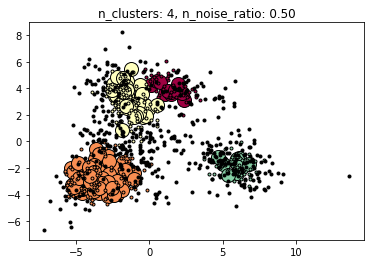

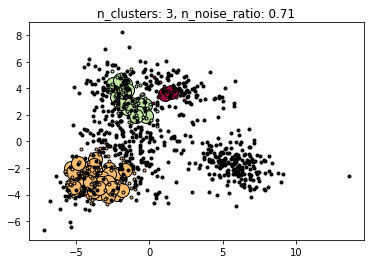

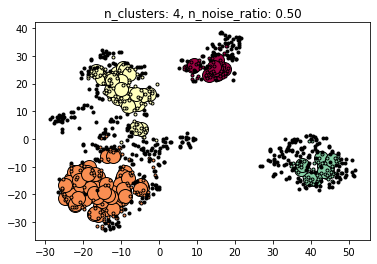

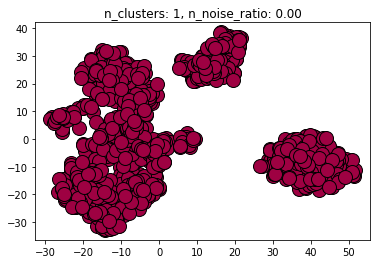

In [583]:
plot_dbscan(dbscan2, reduced_data)
plot_dbscan(dbscan0, reduced_data)
plot_dbscan(dbscan2, reduced_data_tsne)
plot_dbscan(dbscan1, reduced_data_tsne)

# Hierarchical clustering

In data mining and statistics, **hierarchical clustering** (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

* **Agglomerative**: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
* **Divisive**: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

The *AgglomerativeClustering* object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

* **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

* **Maximum** or **complete linkage** minimizes the maximum distance between observations of pairs of clusters.

* **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

* **Single linkage** minimizes the distance between the closest observations of pairs of clusters.

In [584]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

def bench_ac(ac, name, data, labels):

    # Define the metrics which require only the true labels and estimator
    # labels
    evaluation = pd.DataFrame({'Model':[],
                            'Details':[],
                            'Scaler':[],
                            'Time':[],
                            'Inertia':[],
                           'Homogeneity':[],
                           'Completeness':[],
                           'V_measure':[],
                           'Adjusted Rand Score':[],
                           'Adjusted Mutual Info Score':[],
                           "Fowlkes Mallows Score": [],
                           'Sihoulete Score':[],
                           "Calinski Harabasz Score":[],
                           "Davies Bouldin Score": []})
                           
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.fowlkes_mallows_score
    ]
    # The scores requires the full dataset
    clustering_metrics_1 = [
        metrics.silhouette_score,
        metrics.calinski_harabasz_score,
        metrics.davies_bouldin_score
    ]

    scalers = [('None',False),('MinMaxScaler',MinMaxScaler()),('Standardize',StandardScaler())]
    
    for scaler in scalers:
        if scaler[0] != 'None':
            t0 = time()
            estimator = make_pipeline(scaler[1], ac).fit(data)
            fit_time = time() - t0
            detail = estimator[1].get_params(deep=True)['linkage']
            results = [name, f"{detail}", str(scaler[0]), fit_time, "-"]      
            results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
            results += [m(data, estimator[-1].labels_) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True) 
        else:
            t0 = time()
            estimator = ac.fit(data)
            fit_time = time() - t0
            detail = ac.get_params(deep=True)['linkage']
            results = [name, f"{detail}", str(scaler[0]), fit_time, "-"]        
            results += [m(labels, ac.labels_) for m in clustering_metrics]
            results += [m(data, ac.labels_) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True)   

    return evaluation

In [585]:
from sklearn.cluster import AgglomerativeClustering

# print(82 * "_")
# print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

ac1 = AgglomerativeClustering(linkage="ward", n_clusters=n_dates)
ac_1 = bench_ac(ac=ac1, name="Agglomerative Clustering", data=date_data, labels=labels)

ac2 = AgglomerativeClustering(linkage="average", n_clusters=n_dates)
ac_2 = bench_ac(ac=ac2, name="Agglomerative Clustering", data=date_data, labels=labels)

ac3 = AgglomerativeClustering(linkage="complete", n_clusters=n_dates)
ac_3 = bench_ac(ac=ac3, name="Agglomerative Clustering", data=date_data, labels=labels)

ac4 = AgglomerativeClustering(linkage="single", n_clusters=n_dates)
ac_4 = bench_ac(ac=ac4, name="Agglomerative Clustering", data=date_data, labels=labels)

total_ac = [ac_1, ac_2, ac_3, ac_4]

evaluation = evaluation.append(total_ac, ignore_index=True)
evaluation.sort_values(by='Adjusted Rand Score', ascending=False, inplace=True, ignore_index=True)
evaluation
# print(82 * "_")

,Model,Details,Scaler,Time,Inertia,Homogeneity,Completeness,V_measure,Adjusted Rand Score,Adjusted Mutual Info Score,Fowlkes Mallows Score,Sihoulete Score,Calinski Harabasz Score,Davies Bouldin Score
0,kmeans,k-means++,MinMaxScaler,0.123924,253,0.737093,0.717178,0.726999,0.701579,0.724002,0.750333,0.089959,638.265140,2.169585
1,kmeans,random,Standardize,0.078950,8.75x10^3,0.703431,0.708974,0.706192,0.688964,0.702863,0.741045,0.088386,594.155752,2.851556
2,kmeans,k-means++,Standardize,0.102937,8.72x10^3,0.710215,0.717081,0.713631,0.682319,0.710381,0.735566,0.068366,563.912458,2.882822
3,kmeans,k-means++,Standardize,0.203886,8.96x10^3,0.672438,0.699635,0.685767,0.681443,0.682137,0.737633,0.092742,457.452681,3.824177
4,kmeans,PCA Based,Standardize,0.009993,8.76x10^3,0.725943,0.730594,0.728261,0.680841,0.725182,0.734119,0.074959,546.895034,3.191765
5,Agglomerative Clustering,ward,MinMaxScaler,0.044971,-,0.720679,0.710858,0.715735,0.675945,0.712583,0.729284,0.047750,495.507488,2.130204
6,kmeans,random,MinMaxScaler,0.086424,254,0.715052,0.693512,0.704117,0.672177,0.700875,0.725527,0.100820,672.681842,2.466217
7,kmeans,k-means++,MinMaxScaler,0.208519,255,0.708124,0.689667,0.698774,0.665376,0.695463,0.719930,0.100432,655.996503,2.214359
8,kmeans,PCA Based,MinMaxScaler,0.012993,259,0.692469,0.679713,0.686032,0.662542,0.682565,0.717950,0.088770,722.462706,2.342702
9,Agglomerative Clustering,complete,Standardize,0.044974,-,0.638684,0.741318,0.686184,0.648232,0.682788,0.718148,-0.007048,332.435551,3.029523


Let's plot and visualize the result on 2D plane

Computing embedding
Done.
ward :	0.03s
average :	0.02s
complete :	0.03s
single :	0.01s


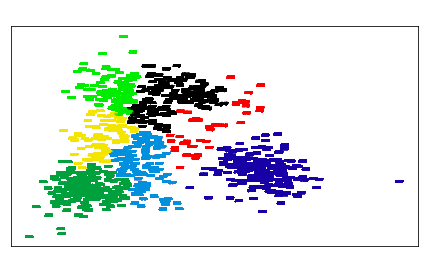

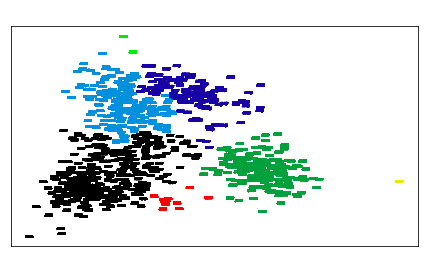

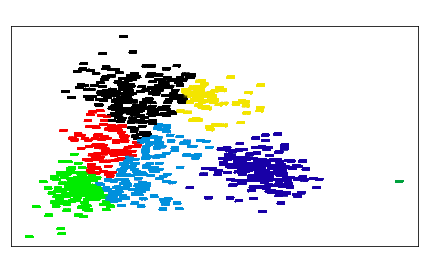

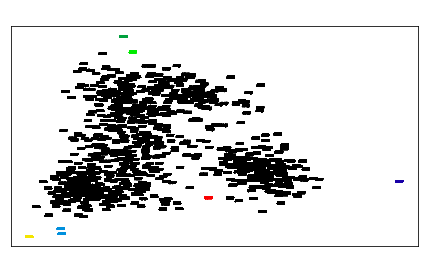

In [586]:
from sklearn import manifold
# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, label, title=None):

    plt.figure(figsize=(6, 4))
    for k in labels:
        plt.scatter(
            *X_red[labels == k].T,
            marker=f"${k}$",
            s=50,
            c=plt.cm.nipy_spectral(label[labels == k] / n_dates),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17, color = 'White')
    plt.axis()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = PCA(n_components=2).fit_transform(date_data_1)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=n_dates)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [587]:
def plot_som(som, data_som):

    t0 = time()
    som.fit(data_som)
    t_som = time() - t0

    fig = plt.figure(figsize=(15, 8))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
    # colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d']
    colors = cm.rainbow(np.linspace(0, 1, n_dates))

    som_labels = som.fit_predict(data_som)

    data_som = PCA(n_components=2).fit_transform(data_som)

    # SOM
    ax = fig.add_subplot(1, 2, 1)
    for k, col in zip(range(n_dates), colors):
        my_members = som_labels == k
        ax.plot(data_som[my_members, 0], data_som[my_members, 1], "w", markerfacecolor=col, marker="o", label=classes[k])
    ax.legend()
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('SOM', color='white')
    plt.text(0, 0, "train time: %.2f" %(t_som))

    true_labels = data['Class'].replace(classes, np.arange(len(classes))).values

    # Actual
    ax = fig.add_subplot(1, 2, 2)
    for k, col in zip(range(n_dates), colors):
        mask = true_labels == k
        ax.plot(data_som[mask, 0], data_som[mask, 1], "w", markerfacecolor=col, marker="o", label=classes[k])
    ax.legend()
    ax.set_title("Actual", color = "White")
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

In [1]:
plot_som(kmeans, date_data_1)

NameError: name 'plot_som' is not defined

# SOM (Self-organizing map)

A self-organizing map (SOM) or self-organizing feature map (SOFM) is an unsupervised machine learning technique used to produce a low-dimensional (typically two-dimensional) representation of a higher dimensional data set while preserving the topological structure of the data. For example, a data set with $p$ variables measured in $n$ observations could be represented as clusters of observations with similar values for the variables. These clusters then could be visualized as a two-dimensional "map" such that observations in proximal clusters have more similar values than observations in distal clusters. This can make high-dimensional data easier to visualize and analyze.

An SOM is a type of artificial neural network but is trained using competitive learning rather than the error-correction learning (e.g., backpropagation with gradient descent) used by other artificial neural networks. The SOM was introduced by the Finnish professor Teuvo Kohonen in the 1980s and therefore is sometimes called a Kohonen map or Kohonen network. The Kohonen map or network is a computationally convenient abstraction building on biological models of neural systems from the 1970s. and morphogenesis models dating back to Alan Turing in the 1950s.

## Overview

Self-organizing maps, like most artificial neural networks, operate in two modes: training and mapping. First, training uses an input data set (the "input space") to generate a lower-dimensional representation of the input data (the "map space"). Second, mapping classifies additional input data using the generated map.

In most cases, the goal of training is to represent an input space with p dimensions as a map space with two dimensions. Specifically, an input space with p variables is said to have p dimensions. A map space consists of components called "nodes" or "neurons," which are arranged as a hexagonal or rectangular grid with two dimensions. The number of nodes and their arrangement are specified beforehand based on the larger goals of the analysis and exploration of the data.

Each node in the map space is associated with a "weight" vector, which is the position of the node in the input space. While nodes in the map space stay fixed, training consists in moving weight vectors toward the input data (reducing a distance metric such as Euclidean distance) without spoiling the topology induced from the map space. After training, the map can be used to classify additional observations for the input space by finding the node with the closest weight vector (smallest distance metric) to the input space vector.

In [ ]:
from sklearn_som.som import SOM

def bench_som(som, name, detail, data, labels):

    # Define the metrics which require only the true labels and estimator
    # labels
    evaluation = pd.DataFrame({'Model':[],
                            'Details':[],
                            'Scaler':[],
                            'Time':[],
                            'Inertia':[],
                           'Homogeneity':[],
                           'Completeness':[],
                           'V_measure':[],
                           'Adjusted Rand Score':[],
                           'Adjusted Mutual Info Score':[],
                           "Fowlkes Mallows Score": [],
                           'Sihoulete Score':[],
                           "Calinski Harabasz Score":[],
                           "Davies Bouldin Score": []})
                           
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
        metrics.fowlkes_mallows_score
    ]
    # The scores requires the full dataset
    clustering_metrics_1 = [
        metrics.silhouette_score,
        metrics.calinski_harabasz_score,
        metrics.davies_bouldin_score
    ]

    scalers = [('None',False),('MinMaxScaler',MinMaxScaler()),('Standardize',StandardScaler())]
    
    for scaler in scalers:
        if scaler[0] != 'None':
            t0 = time()
            data1 = scaler[1].fit_transform(data)
            data2 = som.fit_transform(data1)
            fit_time = time() - t0
            results = [name, detail, str(scaler[0]), fit_time, "-"]   
            pred = som.fit_predict(data1)
            results += [m(labels, pred) for m in clustering_metrics]
            results += [m(data, pred) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True) 
        else:
            t0 = time()
            data1 = som.fit_transform(data)
            fit_time = time() - t0
            pred = som.fit_predict(data)
            results = [name, detail, str(scaler[0]), fit_time, "-"]        
            results += [m(labels, pred) for m in clustering_metrics]
            results += [m(data, pred) for m in clustering_metrics_1]
            evaluation = evaluation.append(pd.Series(results, index=evaluation.columns), ignore_index=True)   

    return evaluation

In [ ]:
som1 = SOM(m=1,n=7, dim=n_features)
som_1 = bench_som(som=som1, name="SOM", detail = '1x7, time = fit_transform', data=date_data, labels=labels)

# ac2 = AgglomerativeClustering(linkage="average", n_clusters=n_dates)
# ac_2 = bench_ac(ac=ac2, name="Agglomerative Clustering", data=date_data, labels=labels)

# ac3 = AgglomerativeClustering(linkage="complete", n_clusters=n_dates)
# ac_3 = bench_ac(ac=ac3, name="Agglomerative Clustering", data=date_data, labels=labels)

# ac4 = AgglomerativeClustering(linkage="single", n_clusters=n_dates)
# ac_4 = bench_ac(ac=ac4, name="Agglomerative Clustering", data=date_data, labels=labels)

total_som = [som_1]

evaluation = evaluation.append(total_som, ignore_index=True)
evaluation.sort_values(by='Adjusted Rand Score', ascending=False, inplace=True, ignore_index=True)
evaluation
# print(82 * "_")

,Model,Details,Scaler,Time,Inertia,Homogeneity,Completeness,V_measure,Adjusted Rand Score,Adjusted Mutual Info Score,Fowlkes Mallows Score,Sihoulete Score,Calinski Harabasz Score,Davies Bouldin Score
0,kmeans,k-means++,MinMaxScaler,0.112931,253,0.737093,0.717178,0.726999,0.701579,0.724002,0.750333,0.089959,638.265140,2.169585
1,kmeans,random,Standardize,0.073036,8.75x10^3,0.703431,0.708974,0.706192,0.688964,0.702863,0.741045,0.088386,594.155752,2.851556
2,kmeans,k-means++,Standardize,0.092829,8.72x10^3,0.710215,0.717081,0.713631,0.682319,0.710381,0.735566,0.068366,563.912458,2.882822
3,kmeans,k-means++,Standardize,0.179260,8.96x10^3,0.672438,0.699635,0.685767,0.681443,0.682137,0.737633,0.092742,457.452681,3.824177
4,kmeans,PCA Based,Standardize,0.012993,8.76x10^3,0.725943,0.730594,0.728261,0.680841,0.725182,0.734119,0.074959,546.895034,3.191765
5,Agglomerative Clustering,ward,MinMaxScaler,0.042918,-,0.720679,0.710858,0.715735,0.675945,0.712583,0.729284,0.047750,495.507488,2.130204
6,SOM,"1x7, time = fit_transform",Standardize,0.295945,-,0.700957,0.695862,0.698400,0.674108,0.695044,0.728222,0.035850,502.917105,2.739748
7,kmeans,random,MinMaxScaler,0.071958,254,0.715052,0.693512,0.704117,0.672177,0.700875,0.725527,0.100820,672.681842,2.466217
8,kmeans,k-means++,MinMaxScaler,0.157904,255,0.708124,0.689667,0.698774,0.665376,0.695463,0.719930,0.100432,655.996503,2.214359
9,kmeans,PCA Based,MinMaxScaler,0.012994,259,0.692469,0.679713,0.686032,0.662542,0.682565,0.717950,0.088770,722.462706,2.342702


## Visualization

In [589]:
from matplotlib.pyplot import cm

def plot_som(som, data_som):

    t0 = time()
    som.fit(data_som)
    t_som = time() - t0

    fig = plt.figure(figsize=(15, 8))
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
    # colors = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d']
    colors = cm.rainbow(np.linspace(0, 1, n_dates))

    som_labels = som.fit_predict(data_som)

    data_som = PCA(n_components=2).fit_transform(data_som)

    # SOM
    ax = fig.add_subplot(1, 2, 1)
    for k, col in zip(range(n_dates), colors):
        my_members = som_labels == k
        ax.plot(data_som[my_members, 0], data_som[my_members, 1], "w", markerfacecolor=col, marker="o", label=classes[k])
    ax.legend()
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('SOM', color='white')
    plt.text(0, 0, "train time: %.2f" %(t_som))

    true_labels = data['Class'].replace(classes, np.arange(len(classes))).values

    # Actual
    ax = fig.add_subplot(1, 2, 2)
    for k, col in zip(range(n_dates), colors):
        mask = true_labels == k
        ax.plot(data_som[mask, 0], data_som[mask, 1], "w", markerfacecolor=col, marker="o", label=classes[k])
    ax.legend()
    ax.set_title("Actual", color = "White") 
    ax.set_xticks(())
    ax.set_yticks(())

    plt.show()

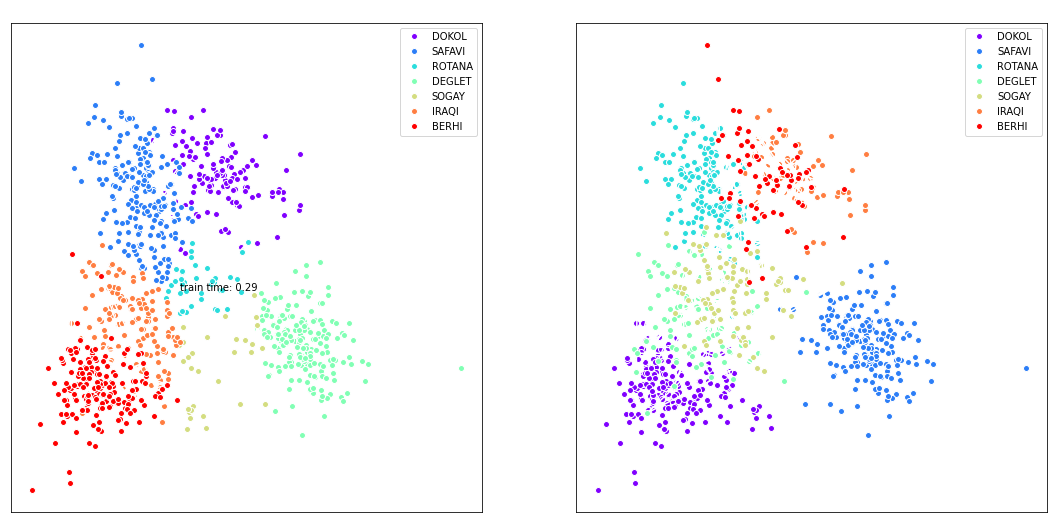

: 

In [590]:
plot_som(som1,date_data_1)